# Hiyerar≈üik K√ºmeleme

Ama√ß, g√∂zlemleri birbirlerine olan benzerliklerine g√∂re alt k√ºmelere ayƒ±rmaktƒ±r.

![](image02.png)

![image.png](image03.png)

![image.png](image04.png)

![image.png](image05.png)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:, 0]
df = df.iloc[:, 1:5]
df.index.name = None
df.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Farklƒ± baƒülantƒ± y√∂ntemleri (linkage methods)
hc_complete = linkage(df, method="complete")
hc_average  = linkage(df, method="average")
hc_single   = linkage(df, method="single")

**linkage(df, method="complete")**  
Hiyerar≈üik k√ºmeleme yaparken k√ºmeler arasƒ± mesafeyi en uzak iki noktanƒ±n mesafesine g√∂re hesaplar. Buna complete linkage denir.
Yani k√ºmeleri birle≈ütirirken ‚Äúen uzak elemanlarƒ±n mesafesi‚Äù baz alƒ±nƒ±r.

**linkage(df, method="average")**  
K√ºmeler arasƒ±ndaki mesafeyi hesaplamak i√ßin iki k√ºmedeki elemanlarƒ±n ortalama mesafesini alƒ±r.

**linkage(df, method="single")**  
K√ºmeler arasƒ±ndaki mesafe, iki k√ºmedeki elemanlardan en yakƒ±n olan iki noktanƒ±n mesafesi ile belirlenir.

**dendrogram(...)**  
Hiyerar≈üik k√ºmeleme sonucunu g√∂rselle≈ütiren aƒüa√ß yapƒ±sƒ±dƒ±r.
X ekseninde veri indeksleri, Y ekseninde k√ºmelerin birle≈üme uzaklƒ±klarƒ± g√∂sterilir.

**leaf_font_size=10**  
X eksenindeki etiketlerin (veri noktalarƒ±nƒ±n) yazƒ± boyutunu k√º√ß√ºlt√ºr ki uzun veri isimleri birbirine girmesin.

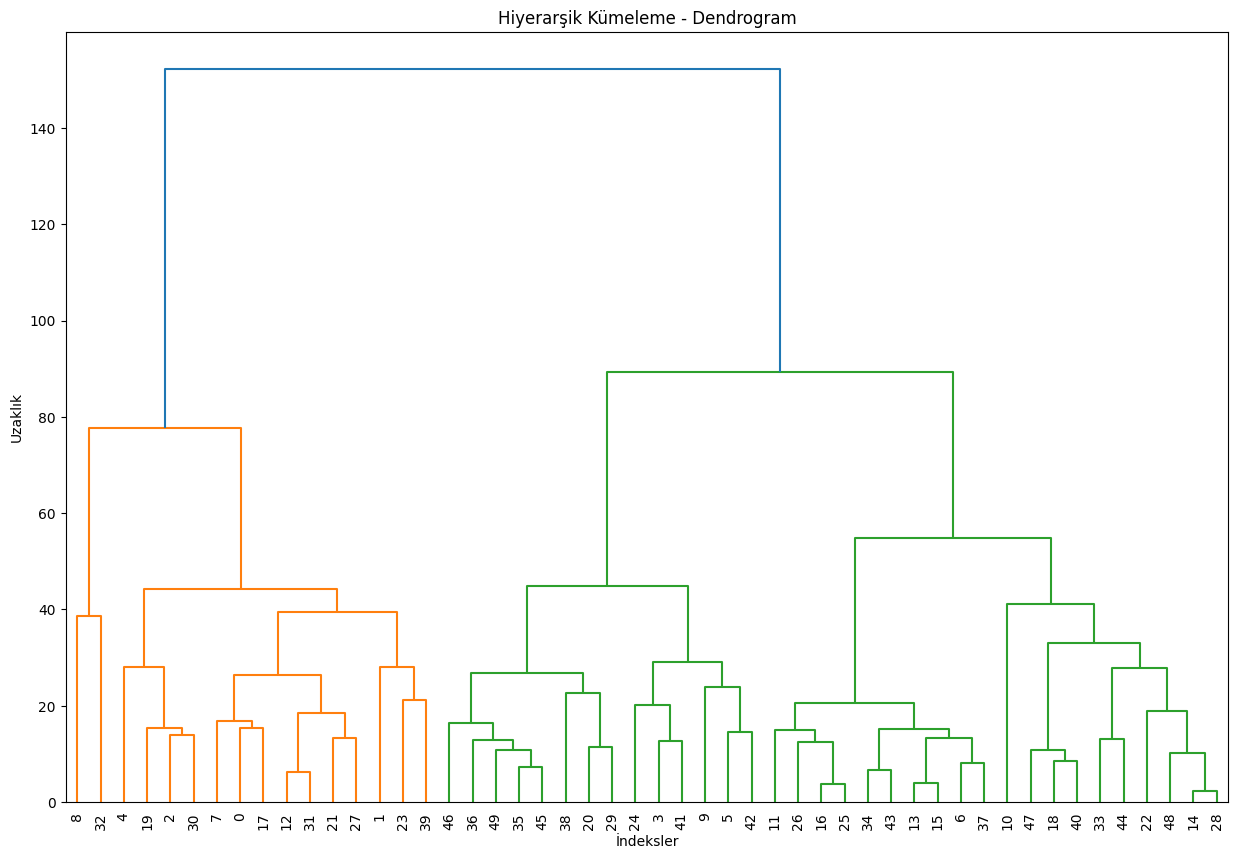

In [10]:
# Dendrogram √ßizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerar≈üik K√ºmeleme - Dendrogram")
plt.xlabel("ƒ∞ndeksler")
plt.ylabel("Uzaklƒ±k")

dendrogram(
    hc_average,   # average linkage ile olu≈üturulmu≈ü sonu√ß
    leaf_font_size=10
)
plt.show()

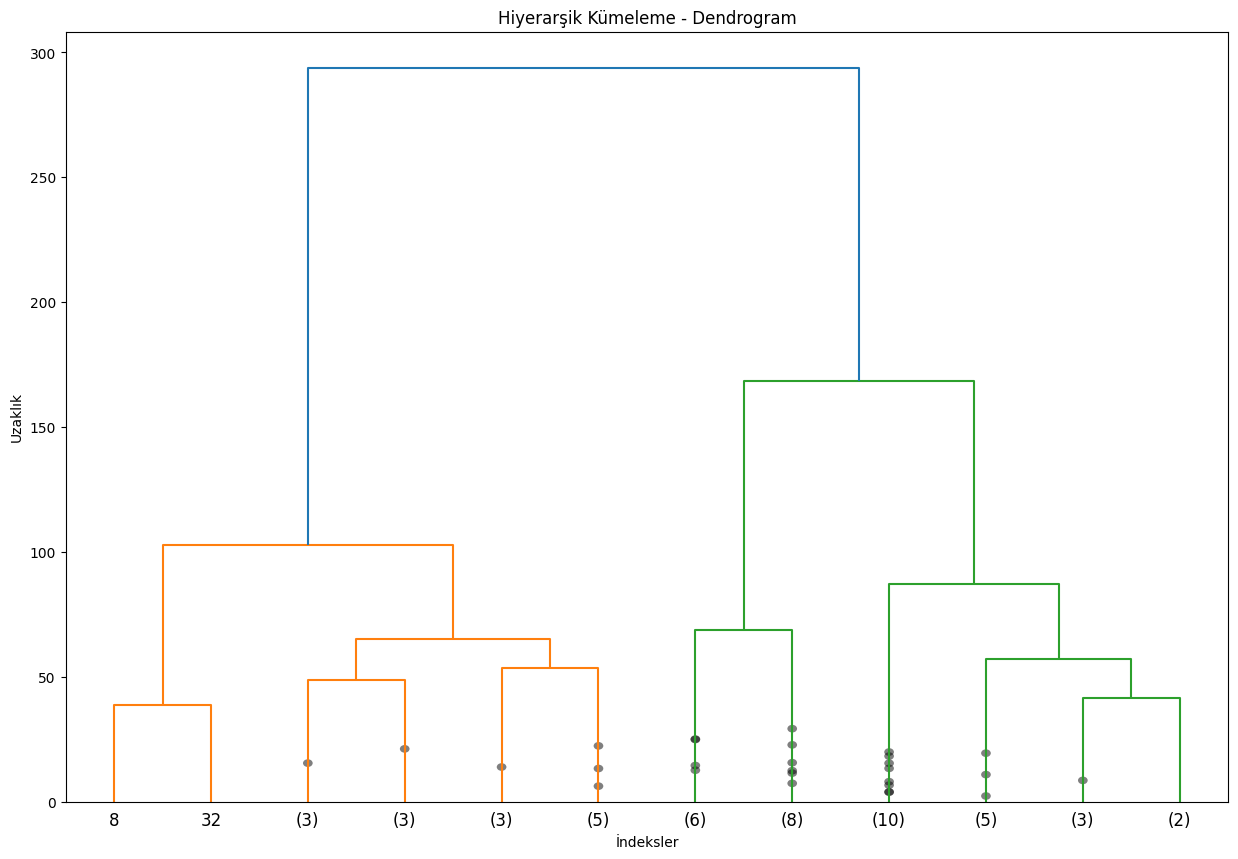

In [11]:
# Dendrogram √ßizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerar≈üik K√ºmeleme - Dendrogram")
plt.xlabel("ƒ∞ndeksler")
plt.ylabel("Uzaklƒ±k")

dendrogram(
    hc_complete,
    truncate_mode="lastp", 
    p=12, 
    show_contracted=True
)
plt.show()

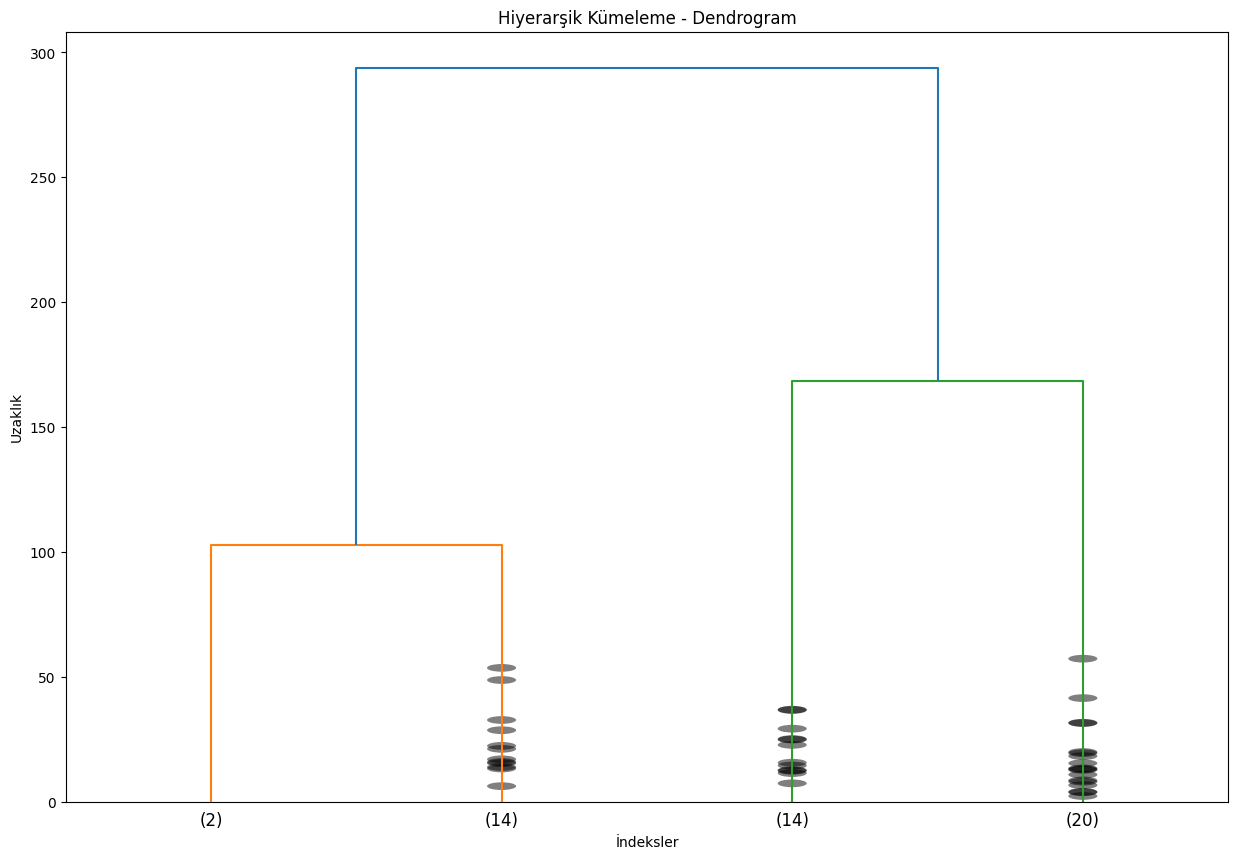

In [16]:
# Dendrogram √ßizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerar≈üik K√ºmeleme - Dendrogram")
plt.xlabel("ƒ∞ndeksler")
plt.ylabel("Uzaklƒ±k")

dendrogram(
    hc_complete,
    truncate_mode="lastp", 
    p=4, 
    show_contracted=True
)
plt.show()

### Optimum K√ºme Sayƒ±sƒ±

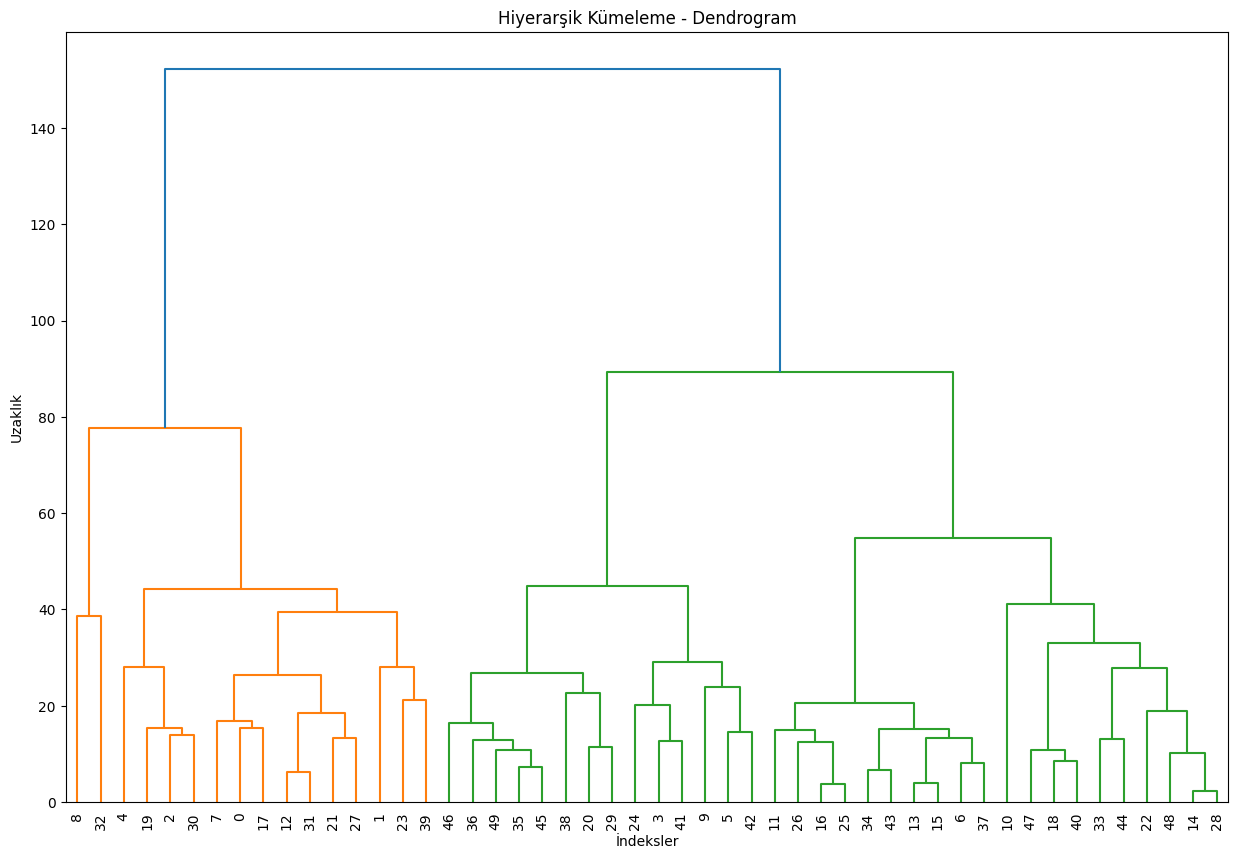

In [17]:
# Dendrogram √ßizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerar≈üik K√ºmeleme - Dendrogram")
plt.xlabel("ƒ∞ndeksler")
plt.ylabel("Uzaklƒ±k")

dendrogram(
    hc_average,   # average linkage ile olu≈üturulmu≈ü sonu√ß
    leaf_font_size=10
)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  metric="euclidean", 
                                  linkage="ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [21]:
df['kume_no'] = cluster.fit_predict(df)

In [22]:
df.head()

Murder  Assault  UrbanPop  Rape  kume_no
Alabama       13.2      236        58  21.2        0
Alaska        10.0      263        48  44.5        0
Arizona        8.1      294        80  31.0        0
Arkansas       8.8      190        50  19.5        2
California     9.0      276        91  40.6        0

üîπ fit
* Modeli veriyle eƒüitir, yani yapƒ±yƒ± √∂ƒürenir (parametreleri, merkezleri, dendrogram vs. √ßƒ±karƒ±r).
* Sadece √∂ƒürenme a≈üamasƒ± yapƒ±lƒ±r, etiket ya da d√∂n√º≈üt√ºr√ºlm√º≈ü veri vermez.

√ñrn:
cluster.fit(df)

üîπ predict
* Bazƒ± algoritmalarda fitten sonra yeni verilere etiket verir.
* Ama AgglomerativeClustering‚Äôde predict yoktur, fit_predict kullanƒ±lƒ±r.


üîπ fit_predict
* Hem √∂ƒürenir hem de k√ºme etiketlerini d√∂nd√ºr√ºr.
* Yani fit + predict birle≈üimi gibidir.
* Senin kullandƒ±ƒüƒ±n doƒüru y√∂ntem bu √ß√ºnk√º direkt etiketleri elde etmek istiyorsun.


üîπ fit_transform
* fit yapar (modeli √∂ƒürenir), sonra da veriyi d√∂n√º≈üt√ºr√ºr.
* Bu daha √ßok √∂l√ßekleme (StandardScaler, MinMaxScaler) veya boyut indirgeme (PCA, t-SNE) gibi y√∂ntemlerde kullanƒ±lƒ±r.